In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.tree import *
from sklearn.ensemble import *
from numpy import random
from sklearn.preprocessing import *
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier

# stroke

In [2]:
df=pd.read_csv("/kaggle/input/basic-datasets/stroke.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
df.shape

(43400, 12)

In [4]:
df.count()

id                   43400
gender               43400
age                  43400
hypertension         43400
heart_disease        43400
ever_married         43400
work_type            43400
Residence_type       43400
avg_glucose_level    43400
bmi                  41938
smoking_status       30108
stroke               43400
dtype: int64

In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
print(np.unique(df['work_type']))
print(np.unique(df['Residence_type']))
print(np.unique(df['stroke']))


['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
['Rural' 'Urban']
[0 1]


In [7]:
df['gender']=df['gender'].map({'Male':0,'Female':1})

In [8]:
df['ever_married']=df['ever_married'].map({'No':0,'Yes':1})

In [9]:
df['Residence_type']=df['Residence_type'].map({'Rural':0,'Urban':1})

In [10]:
df=pd.get_dummies(df,columns=['work_type'])

In [11]:
df=df.dropna()

In [12]:
df=df.drop(['id'],axis=1)

In [13]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
1,0.0,58.0,1,0,1,1,87.96,39.2,never smoked,0,False,False,True,False,False
3,1.0,70.0,0,0,1,0,69.04,35.9,formerly smoked,0,False,False,True,False,False
6,1.0,52.0,0,0,1,1,77.59,17.7,formerly smoked,0,False,False,True,False,False
7,1.0,75.0,0,1,1,0,243.53,27.0,never smoked,0,False,False,False,True,False
8,1.0,32.0,0,0,1,0,77.67,32.3,smokes,0,False,False,True,False,False


In [14]:
print(np.unique(df['smoking_status']))

['formerly smoked' 'never smoked' 'smokes']


In [15]:
df=pd.get_dummies(df,columns=['smoking_status'])

In [16]:
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_hat))

accuracy : 0.982625150524686


In [18]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5713
           1       0.00      0.00      0.00       100

    accuracy                           0.98      5813
   macro avg       0.49      0.50      0.50      5813
weighted avg       0.97      0.98      0.97      5813



In [19]:
df.shape

(29065, 17)

In [20]:
df.count()

gender                            29065
age                               29065
hypertension                      29065
heart_disease                     29065
ever_married                      29065
Residence_type                    29065
avg_glucose_level                 29065
bmi                               29065
stroke                            29065
work_type_Govt_job                29065
work_type_Never_worked            29065
work_type_Private                 29065
work_type_Self-employed           29065
work_type_children                29065
smoking_status_formerly smoked    29065
smoking_status_never smoked       29065
smoking_status_smokes             29065
dtype: int64

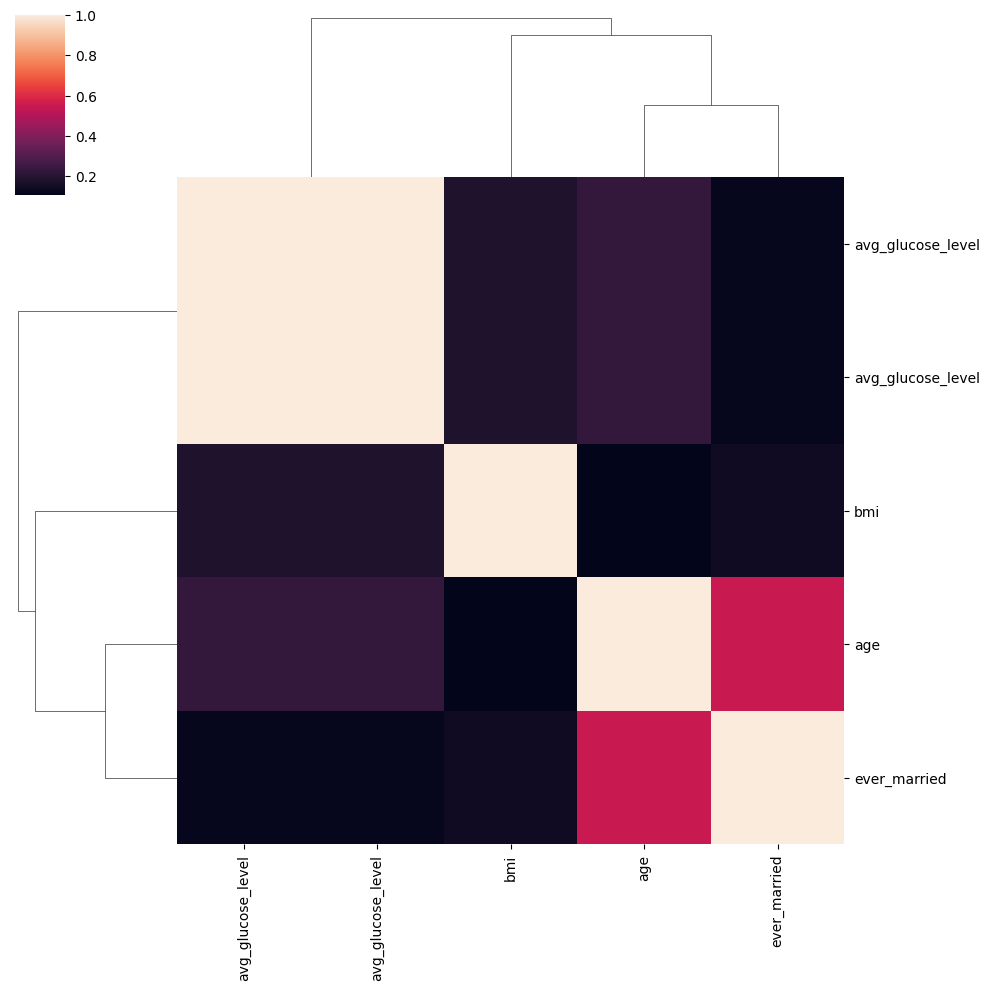

In [21]:
sns.clustermap(abs(df[['age', 'avg_glucose_level', 'bmi','ever_married','avg_glucose_level']].corr()))

# Undersampling

In [22]:
X = df.drop('stroke', axis=1)
y = df['stroke']
sampler = RandomUnderSampler()
X,y=sampler.fit_resample(X,y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_hat))

accuracy : 0.7227272727272728


In [24]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       113
           1       0.69      0.78      0.73       107

    accuracy                           0.72       220
   macro avg       0.73      0.72      0.72       220
weighted avg       0.73      0.72      0.72       220



In [25]:
confusion_matrix(y_test,y_hat)

array([[76, 37],
       [24, 83]])

# Oversampling

In [26]:
X = df.drop('stroke', axis=1)
y = df['stroke']
sampler = RandomOverSampler()
X,y=sampler.fit_resample(X,y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_hat))

accuracy : 0.9977206978171298


In [28]:
confusion_matrix(y_test,y_hat)

array([[5591,   26],
       [   0, 5790]])

In [29]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5617
           1       1.00      1.00      1.00      5790

    accuracy                           1.00     11407
   macro avg       1.00      1.00      1.00     11407
weighted avg       1.00      1.00      1.00     11407



# XGboost

In [30]:
df.stroke.value_counts()

stroke
0    28517
1      548
Name: count, dtype: int64

In [31]:
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(scale_pos_weight=28517/548)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_hat))


accuracy : 0.9360055049028041


In [32]:
confusion_matrix(y_test,y_hat)

array([[5428,  285],
       [  87,   13]])

In [33]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5713
           1       0.04      0.13      0.07       100

    accuracy                           0.94      5813
   macro avg       0.51      0.54      0.52      5813
weighted avg       0.97      0.94      0.95      5813



# churn

In [34]:
df=pd.read_csv("/kaggle/input/basic-datasets/churn-big.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [35]:
df.count()

State                     2666
Account length            2666
Area code                 2666
International plan        2666
Voice mail plan           2666
Number vmail messages     2666
Total day minutes         2666
Total day calls           2666
Total day charge          2666
Total eve minutes         2666
Total eve calls           2666
Total eve charge          2666
Total night minutes       2666
Total night calls         2666
Total night charge        2666
Total intl minutes        2666
Total intl calls          2666
Total intl charge         2666
Customer service calls    2666
Churn                     2666
dtype: int64

In [36]:
df['International plan']=df['International plan'].map({'No':0,'Yes':1})


In [37]:
df['Voice mail plan']=df['Voice mail plan'].map({'No':0,'Yes':1})

In [38]:
df=pd.get_dummies(df,columns=['State'])

In [39]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,False,False,False,False,False,False,False,False,False,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,False,False,False,False,False,False,False,False,False,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,False,False,False,False,False,False,False,False,False,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,False,False,False,False,False,False,False,False,False,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df=df.dropna()

In [41]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,False,False,False,False,False,False,False,False,False,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,False,False,False,False,False,False,False,False,False,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,False,False,False,False,False,False,False,False,False,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,False,False,False,False,False,False,False,False,False,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,False,False,False,False,False,False,False,False,False,False


In [42]:
df.count()

Account length           2666
Area code                2666
International plan       2666
Voice mail plan          2666
Number vmail messages    2666
                         ... 
State_VT                 2666
State_WA                 2666
State_WI                 2666
State_WV                 2666
State_WY                 2666
Length: 70, dtype: int64

In [43]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_hat))

accuracy : 0.9269662921348315


In [45]:
confusion_matrix(y_test,y_hat)

array([[455,   0],
       [ 39,  40]])

In [46]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

       False       0.92      1.00      0.96       455
        True       1.00      0.51      0.67        79

    accuracy                           0.93       534
   macro avg       0.96      0.75      0.82       534
weighted avg       0.93      0.93      0.92       534



## undersampling

In [47]:
X = df.drop('Churn', axis=1)
y = df['Churn']
sampler = RandomUnderSampler()
X,y=sampler.fit_resample(X,y)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_hat))

accuracy : 0.8717948717948718


In [49]:
confusion_matrix(y_test,y_hat)

array([[66, 12],
       [ 8, 70]])

In [50]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

       False       0.89      0.85      0.87        78
        True       0.85      0.90      0.88        78

    accuracy                           0.87       156
   macro avg       0.87      0.87      0.87       156
weighted avg       0.87      0.87      0.87       156



## xgboost

In [51]:
df.Churn.value_counts()

Churn
False    2278
True      388
Name: count, dtype: int64

In [52]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(scale_pos_weight=2278/388) # il faut changer le parametre
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_hat))

accuracy : 0.9588014981273408


## prix de maison a seattle

In [53]:
df=pd.read_csv("/kaggle/input/basic-datasets/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [54]:
df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [55]:
df[df.price>4500000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


<Axes: xlabel='long', ylabel='lat'>

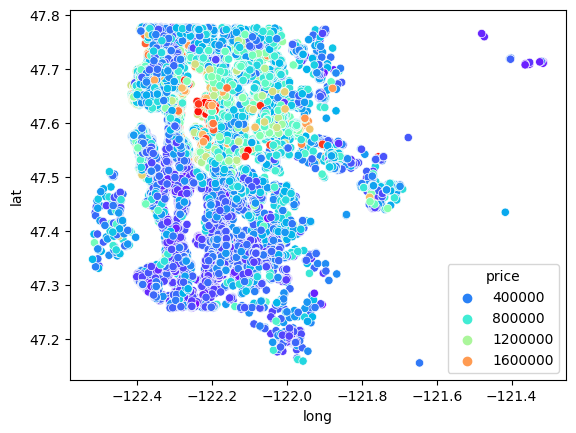

In [56]:
sns.scatterplot(data=df[df.price<2000000],x='long',y='lat',hue='price',palette='rainbow')

In [57]:
df['year']=pd.DatetimeIndex(df['date']).year
df['month']=pd.DatetimeIndex(df['date']).month

In [58]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [59]:
df=df.drop(['id'],axis=1)

In [60]:
df=df.drop(['date'],axis=1)

In [61]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [62]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 44959335428.98499
Mean Absolute percentage Error: 0.24864797186814086
R^2 SCORE : 0.7026040931979199


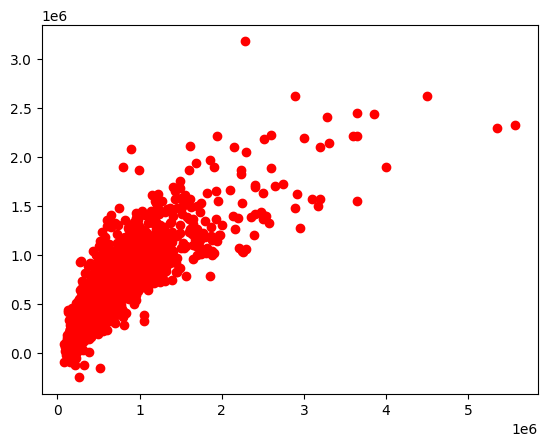

In [64]:
model=LinearRegression()
model.fit(X_train,y_train)
y_hat=model.predict(X_test)
print("Mean Squared Error:",  mean_squared_error(y_test, y_hat))
print("Mean Absolute percentage Error:", mean_absolute_percentage_error(y_test, y_hat))
print('R^2 SCORE :',r2_score(y_test, y_hat))
plt.scatter(y_test,y_hat,c='red')

# xgboost

In [65]:
X = df.drop('price', axis=1).values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 20281933806.534946
Mean Absolute percentage Error: 0.12650277698322515
R^2 SCORE : 0.8658395628284669


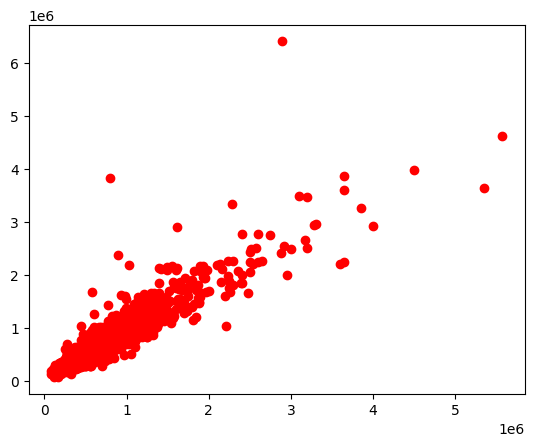

In [66]:
from xgboost import *
model=XGBRegressor()
model.fit(X_train,y_train)
y_hat=model.predict(X_test)
print("Mean Squared Error:",  mean_squared_error(y_test, y_hat))
print("Mean Absolute percentage Error:", mean_absolute_percentage_error(y_test, y_hat))
print('R^2 SCORE :',r2_score(y_test, y_hat))
plt.scatter(y_test,y_hat,c='red')